[https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download]

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from bs4 import BeautifulSoup

In [2]:

df = pd.read_csv("jobs_in_data.csv")

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
print(df.info())

print(30*"#")
print(df.describe())

print(30*"#")
print(df.isnull().sum())

print(30*"#")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None
##############################
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  

In [4]:


def get_exchange_rate(coinI, coinF):
    
    """
    This function attempts to retrieve the exchange rate between two currencies
    from the Google Finance website.

    - Web scraping is inherently fragile, and changes to the website's structure
      may impact the function's reliability.
    """
    url = f"https://www.google.com/finance/quote/{coinI}-{coinF}"

    try:
        # Make the request to the website
        response = requests.get(url)
        response.raise_for_status()

        # Parse the HTML content
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the exchange rate from the page
        exchange_rate_element = soup.find("div", {"class": "YMlKec fxKbKc"})
        
        
        # Check if the element was found before accessing its text
        if exchange_rate_element is not None:
            exchange_rate = exchange_rate_element.text.strip()
            print(f"The current exchange rate between {coinI}-{coinF} is: {exchange_rate}")
            return exchange_rate
        else:
            print(f"Could not find the exchange rate element for {coinI}-{coinF}")
            return 0.0

    except Exception as e:
        print(f"An error occurred: {e}")
        return 0.0


In [5]:
# df["salary_in_eur"] = df["salary_in_usd"] * float(exchange_rate)

In [6]:
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


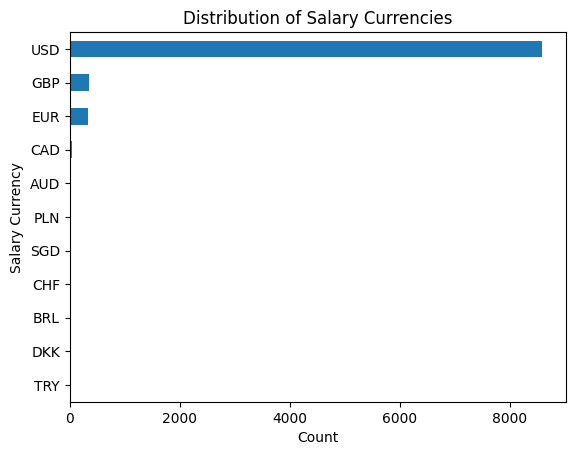

In [7]:
df["salary_currency"].value_counts().sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Salary Currency")
plt.title("Distribution of Salary Currencies")
plt.show()

In [8]:
currencies = df["salary_currency"].unique()

In [9]:
# currencies = currencies[currencies != "EUR"]

In [10]:
def get_exchange_rates(coin, currencies):
    currencies = currencies[currencies != coin]
    exchange_rates = {coin: 1.00}
    for currency in currencies:
        exchange_rates[currency] = float(get_exchange_rate(currency, coin))
        
    return exchange_rates

In [11]:
exchange_rates_eur = get_exchange_rates("EUR", currencies)
print("\n")
exchange_rates_usd = get_exchange_rates("USD", currencies)

The current exchange rate between USD-EUR is: 0.9128
The current exchange rate between GBP-EUR is: 1.1616
The current exchange rate between CAD-EUR is: 0.6826
The current exchange rate between AUD-EUR is: 0.6120
The current exchange rate between PLN-EUR is: 0.2295
The current exchange rate between BRL-EUR is: 0.1872
The current exchange rate between TRY-EUR is: 0.0306
The current exchange rate between CHF-EUR is: 1.0743
The current exchange rate between SGD-EUR is: 0.6860
The current exchange rate between DKK-EUR is: 0.1339


The current exchange rate between EUR-USD is: 1.0958
The current exchange rate between GBP-USD is: 1.2725
The current exchange rate between CAD-USD is: 0.7477
The current exchange rate between AUD-USD is: 0.6717
The current exchange rate between PLN-USD is: 0.2514
The current exchange rate between BRL-USD is: 0.2050
The current exchange rate between TRY-USD is: 0.0335
The current exchange rate between CHF-USD is: 1.1768
The current exchange rate between SGD-USD is

In [12]:
df["salary_in_eur"] = df["salary"] * df["salary_currency"].map(exchange_rates_eur)
df["salary_in_usd"] = df["salary"] * df["salary_currency"].map(exchange_rates_usd)

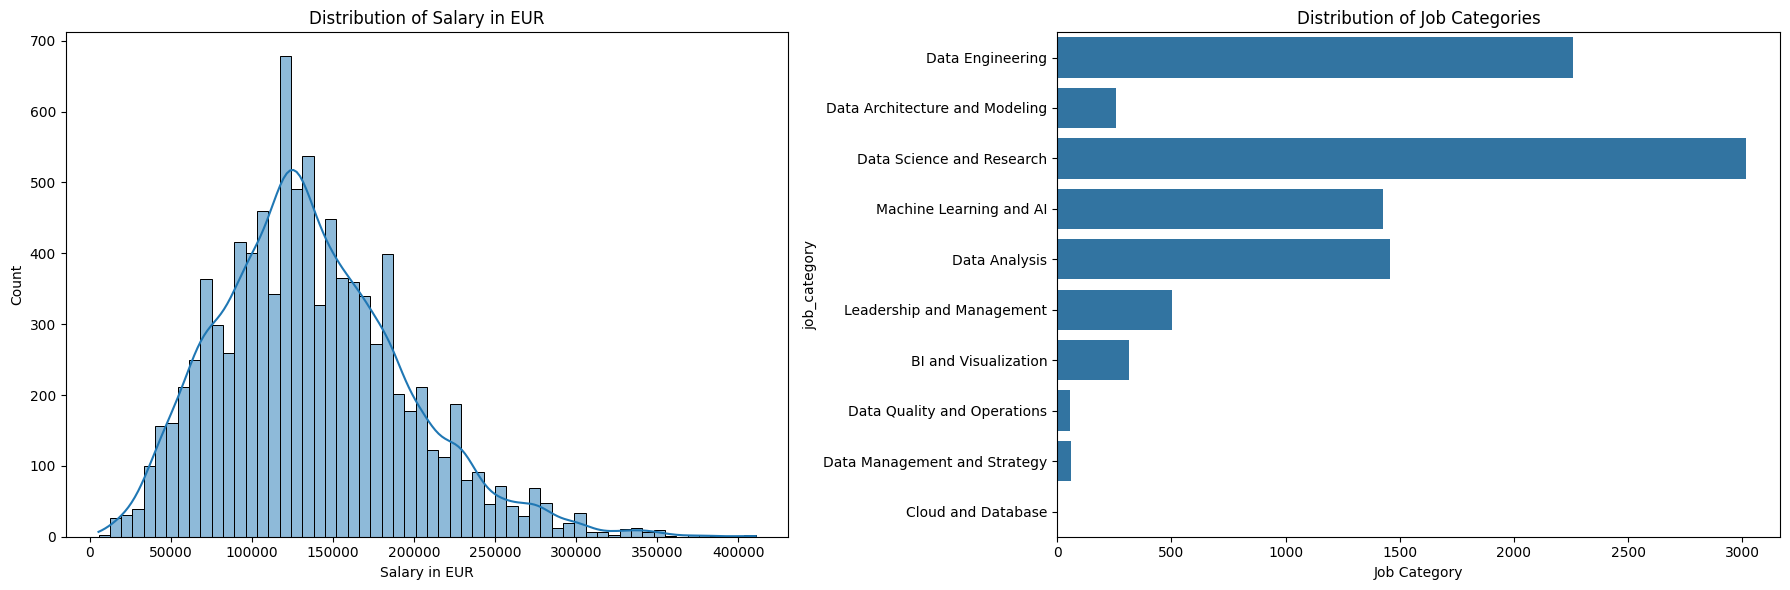

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.histplot(df["salary_in_eur"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Salary in EUR")
axes[0].set_xlabel("Salary in EUR")

sns.countplot(y="job_category", data=df, ax=axes[1])
axes[1].set_title("Distribution of Job Categories")
axes[1].tick_params(axis="y", rotation=0) 
axes[1].set_xlabel("Job Category")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


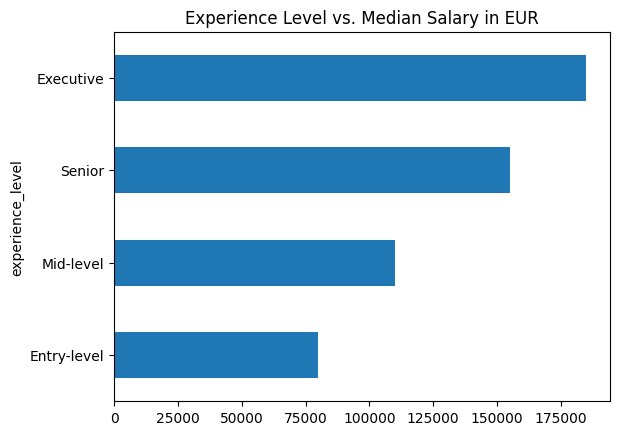

In [14]:
figure, ax = plt.subplots()
salaries = df.groupby("experience_level")["salary_in_usd"].median().sort_values().plot(ax=ax, kind="barh")
plt.title("Experience Level vs. Median Salary in EUR")
plt.show()

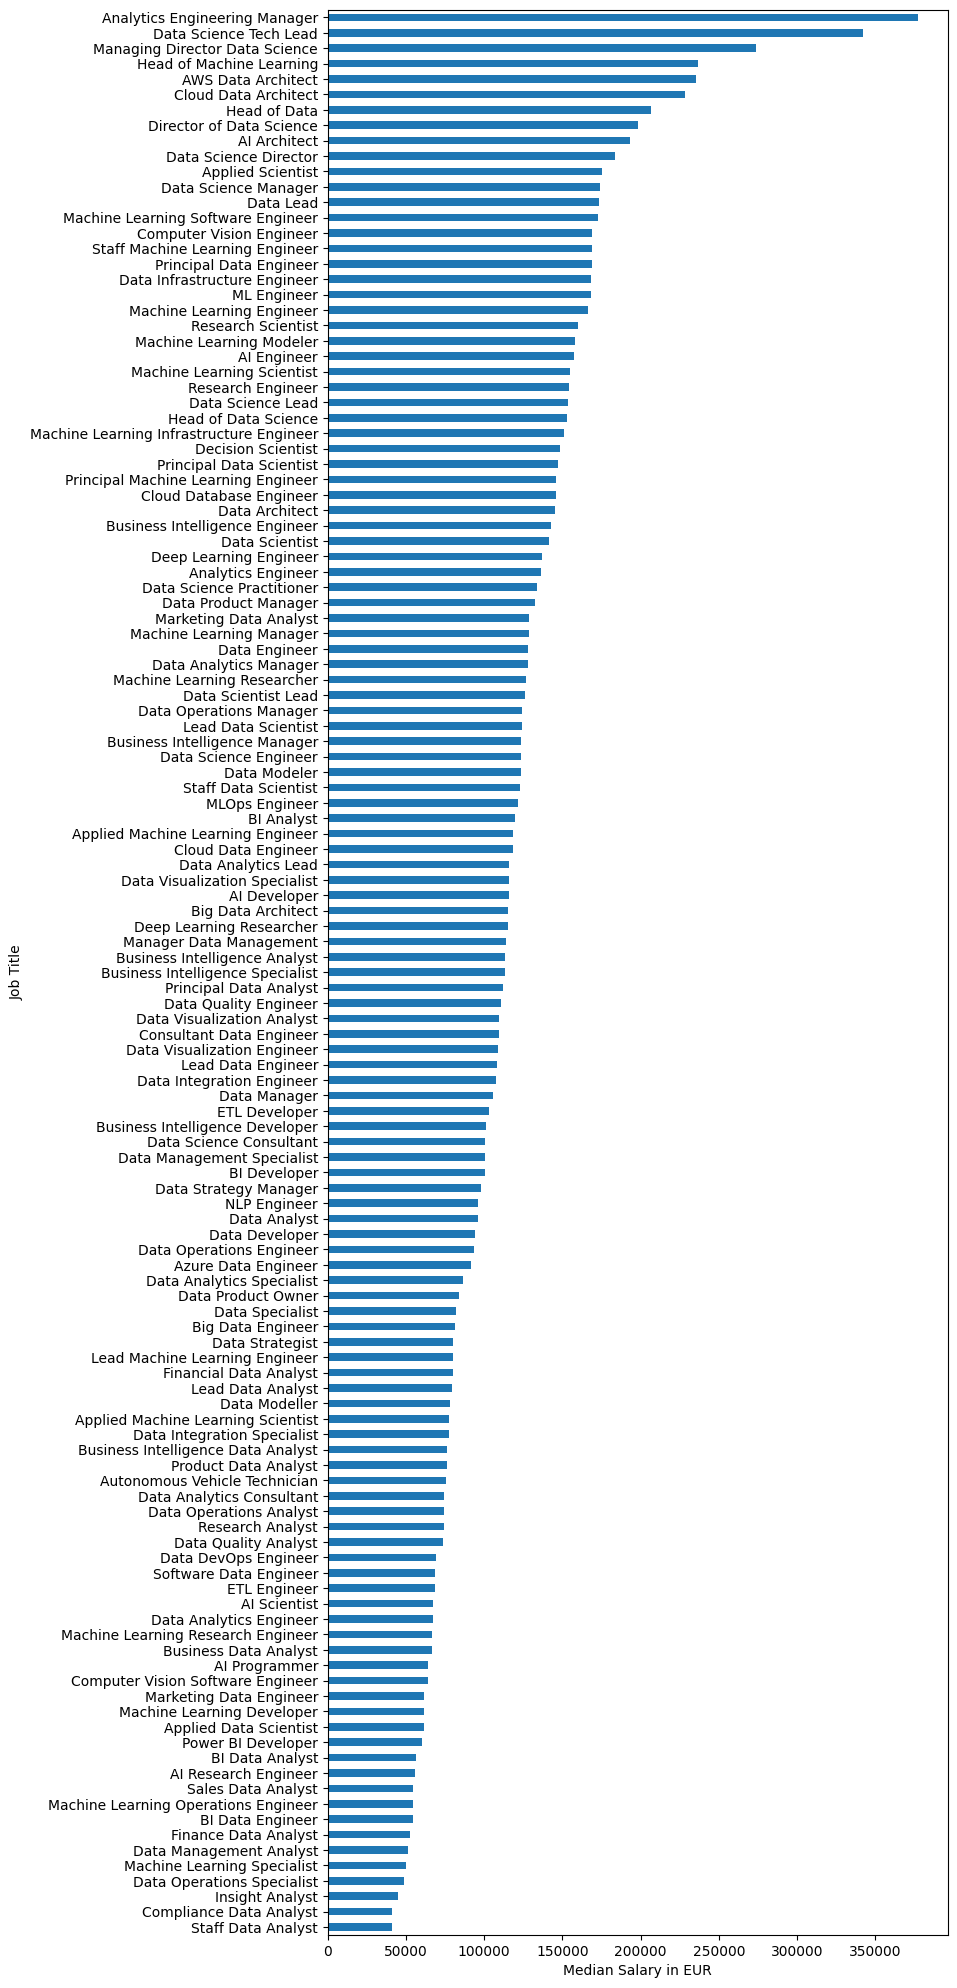

In [15]:
figure, ax = plt.subplots(figsize=(8,25))
salaries = df.groupby("job_title")["salary_in_eur"].median().sort_values().plot(ax=ax, kind="barh")
ax.set_xlabel("Median Salary in EUR")
ax.set_ylabel("Job Title")
plt.show()

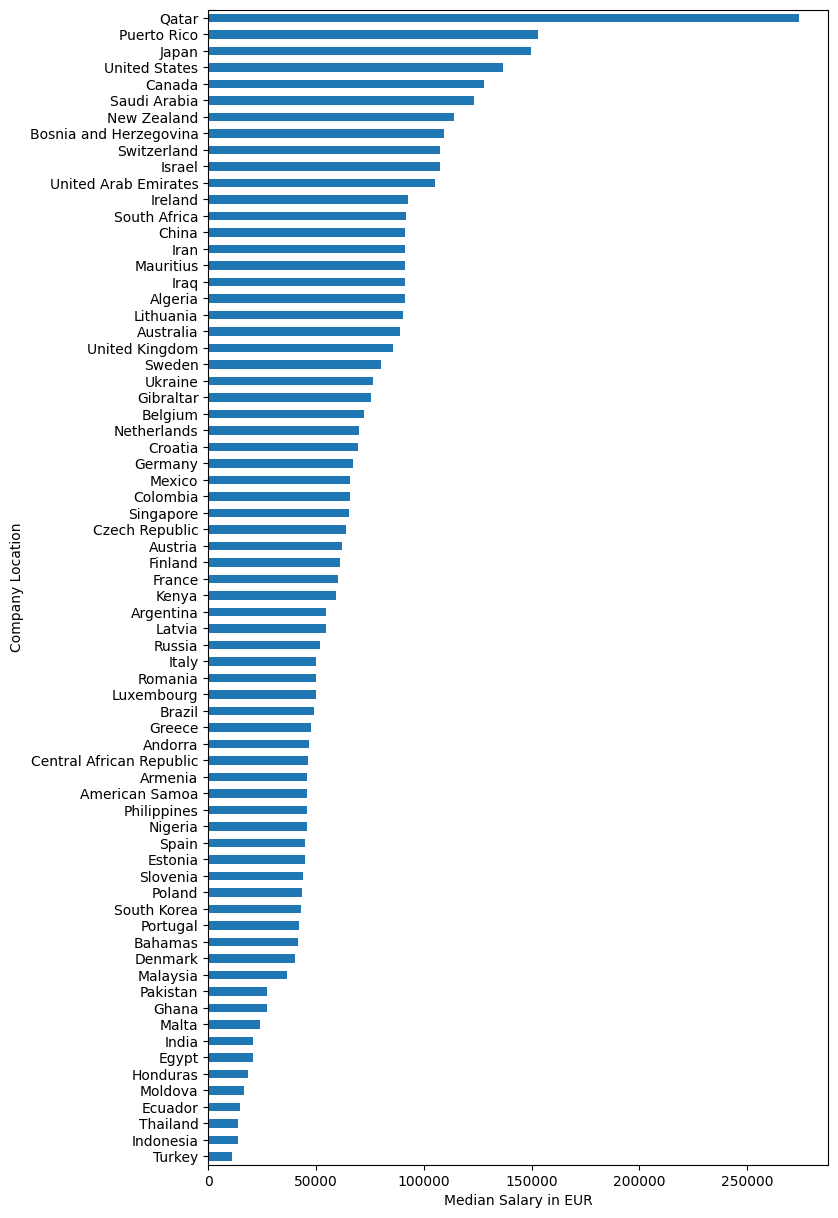

In [16]:
figure, ax = plt.subplots(figsize=(8,15))
salaries = df.groupby("company_location")["salary_in_eur"].median().sort_values().plot(ax=ax, kind="barh")
ax.set_xlabel("Median Salary in EUR")
ax.set_ylabel("Company Location")
plt.show()

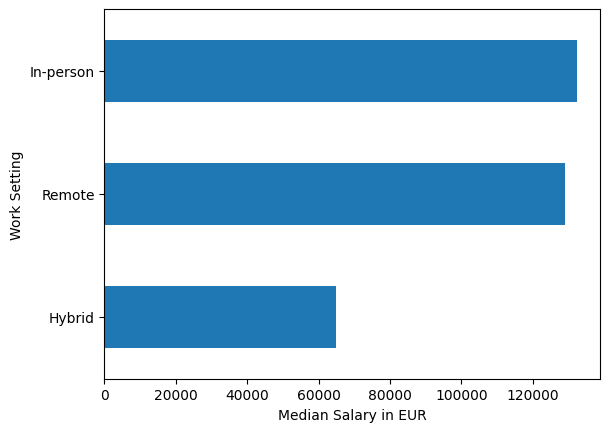

In [17]:
figure, ax = plt.subplots()
salaries = df.groupby("work_setting")["salary_in_eur"].median().sort_values().plot(ax=ax, kind="barh")
ax.set_xlabel("Median Salary in EUR")
ax.set_ylabel("Work Setting")
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   object 
 2   job_category        9355 non-null   object 
 3   salary_currency     9355 non-null   object 
 4   salary              9355 non-null   int64  
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   object 
 7   experience_level    9355 non-null   object 
 8   employment_type     9355 non-null   object 
 9   work_setting        9355 non-null   object 
 10  company_location    9355 non-null   object 
 11  company_size        9355 non-null   object 
 12  salary_in_eur       9355 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 950.2+ KB


In [19]:

ordinal_columns = ["company_size", "experience_level"]

label_encoder = LabelEncoder()
df[ordinal_columns] = df[ordinal_columns].apply(label_encoder.fit_transform)

non_ordinal_columns = ["job_title", "job_category", "salary_currency", "employee_residence", "employment_type", "work_setting", "company_location"]

df = pd.get_dummies(df, columns=non_ordinal_columns, dtype=int)

print(df.head())

   work_year  salary  salary_in_usd  experience_level  company_size  \
0       2023   88000        96430.4                 2             0   
1       2023  186000       186000.0                 3             1   
2       2023   81800        81800.0                 3             1   
3       2023  212000       212000.0                 3             1   
4       2023   93300        93300.0                 3             1   

   salary_in_eur  job_title_AI Architect  job_title_AI Developer  \
0       88000.00                       0                       0   
1      169780.80                       0                       0   
2       74667.04                       0                       0   
3      193513.60                       0                       0   
4       85164.24                       0                       0   

   job_title_AI Engineer  job_title_AI Programmer  ...  \
0                      0                        0  ...   
1                      0                        

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Columns: 312 entries, work_year to company_location_United States
dtypes: float64(2), int64(310)
memory usage: 22.3 MB


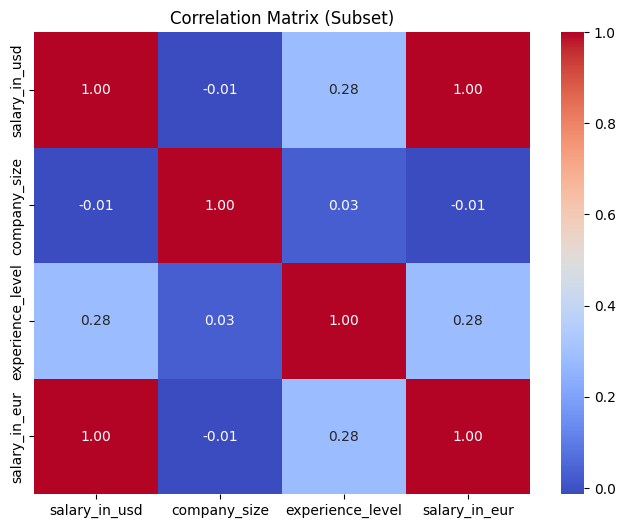

In [24]:
# Select only a subset of numeric columns from the DataFrame
subset_columns = ["salary_in_usd", "company_size", "experience_level", "salary_in_eur"]

numeric_subset = df[subset_columns]

# Create a correlation matrix for the subset
correlation_matrix_subset = numeric_subset.corr()

# Create a smaller heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_subset, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Subset)")
plt.show()
